In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.widgets import *
from zipfile import ZipFile
from fastai.callbacks import SaveModelCallback
import torch


In [0]:
#extract the contents from the zip file if it is a zip file

with ZipFile('/content/drive/My Drive/data/plantdisease.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [0]:
# you can download the dataset from here it also has the models that i trained. "final" is the end model to load https://drive.google.com/open?id=1dzFLz-0_cFcSPFz05j0VWJGqGKbJNyzG

path=Path('/content/drive/My Drive/data/plantvillage/PlantVillage') #point to the dataset in the drive



In [0]:
path.ls() #check whether everything is right with path variable

[PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Pepper__bell___healthy'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Potato___Early_blight'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Potato___Late_blight'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Potato___healthy'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Tomato_Bacterial_spot'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Tomato_Early_blight'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Tomato_Late_blight'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Tomato_Leaf_Mold'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Tomato_Septoria_leaf_spot'),
 PosixPath('/content/drive/My Drive/data/plantvillage/PlantVillage/Tomato_Spider_mi

In [0]:
#define all the classes
classes=['Tomato_Early_blight', 'Tomato__Tomato_mosaic_virus', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Target_Spot', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Pepper__bell___Bacterial_spot'] 

In [0]:
#code to mount google drive to colab this should be the first command to run
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
print(classes)

['Tomato_Early_blight', 'Tomato__Tomato_mosaic_virus', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Target_Spot', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Pepper__bell___Bacterial_spot']


In [0]:
#get the data from the folders and create them into the databunch 
#batch size is 64, validation is 20% of whole dataset, perform trasformations like flipping, lighting etc, image size is 224*224, normalize the train and validation data to make sure mean is close to 0 and standard deviation is close to 1.
#imagenet stats has the values that should be used for normalization since resnet is pretrained with imagenet
#to indroduce randomness t choose the dataset np.random.seed() is used
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(),bs=64,size=224, num_workers=4).normalize(imagenet_stats)
        

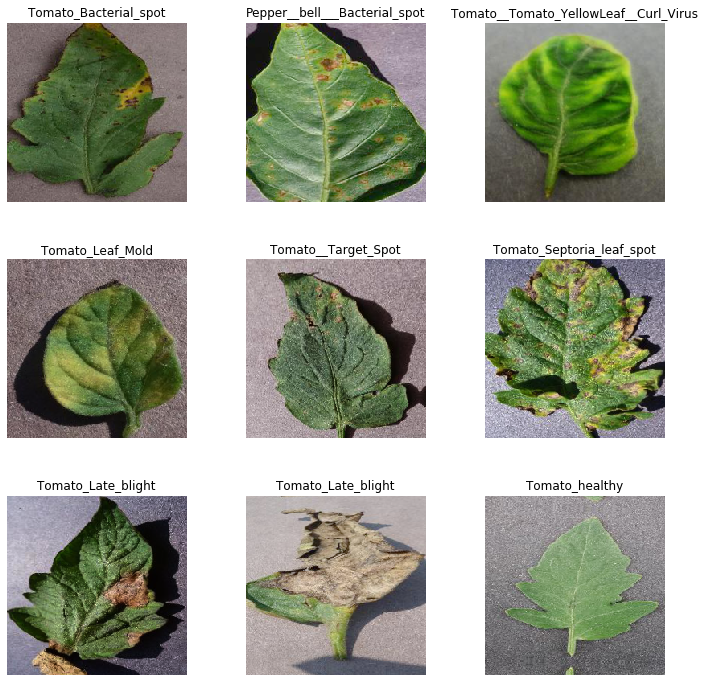

In [0]:
data.show_batch(rows=3, figsize=(10,10)) 

In [0]:
#running on gpu
device = torch.device("cuda:0")




In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
print(device)

In [0]:
#loading the trained model 
learn.load('final')

Learner(data=ImageDataBunch;

Train: LabelList (16511 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Pepper__bell___Bacterial_spot,Pepper__bell___Bacterial_spot,Pepper__bell___Bacterial_spot,Pepper__bell___Bacterial_spot,Pepper__bell___Bacterial_spot
Path: /content/drive/My Drive/data/plantvillage/PlantVillage;

Valid: LabelList (4127 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato_Spider_mites_Two_spotted_spider_mite,Potato___Early_blight,Tomato_Late_blight,Tomato__Tomato_YellowLeaf__Curl_Virus,Tomato_Spider_mites_Two_spotted_spider_mite
Path: /content/drive/My Drive/data/plantvillage/PlantVillage;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [0]:
#unfreeze all the layers to perform hyper parameter tuning to find the best learning rate
learn.unfreeze()

In [0]:
#find learning rate
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-06
Min loss divided by 10: 9.12E-08


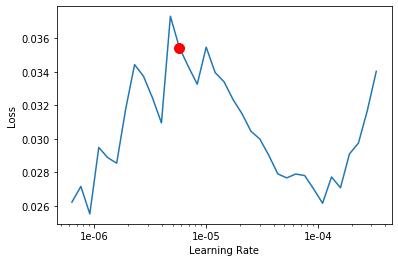

In [0]:
#plot the graph for the loss vs learning rate
#ps: the red poin is just for referenc ethat value can go wrong most of the times so donot follow that use your own intution to find the best lr 
#i follow a thumb rule to choose initial parameter of learning rate as the value where the losses shoots up divided by 10 and second value as the previous learning rate in before training divided by 10
#if its first cycle of training i tend to go wih 3e-03 for image classification problems it is reported to work best for 99 percent of reserach problems
learn.recorder.plot(suggestion=True)

In [0]:
#specify no of epochs learning rate range for discriminative learning and save the model after every epoch
learn.fit_one_cycle(10,max_lr=slice(1e-05,1e-05/2),callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.028702,0.020436,0.993215,3:20:17
1,0.025170,0.019007,0.993942,3:21:07


In [0]:
#run this command right after the training to plot training and validation losses
learn.recorder.plot_losses()

In [0]:
#save the model after training is done
learn.save('stage-1')

In [0]:
#unfreexe and try to find learning rate if you want to train it further and run fit one cycle again wih appropriate values
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
#intrepreting the results
interp = ClassificationInterpretation.from_learner(learn)

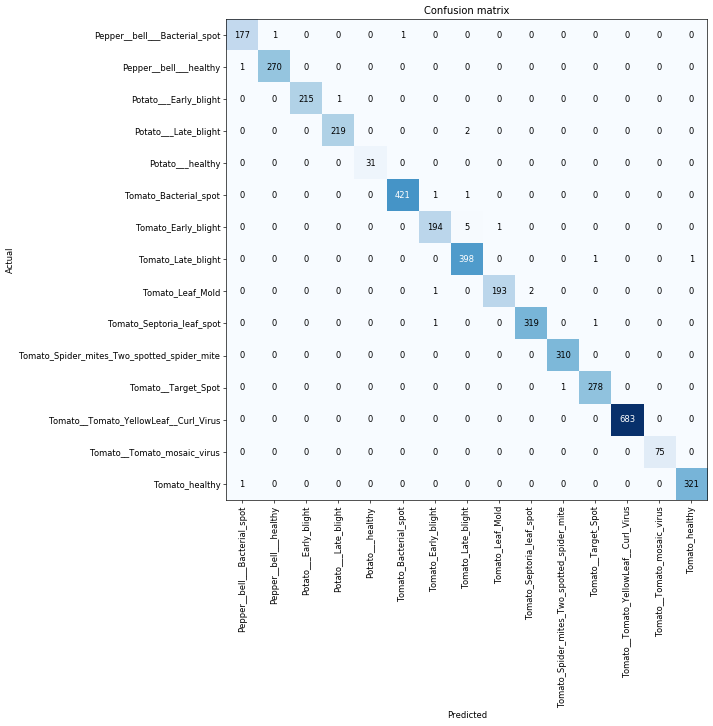

In [0]:
#plot confusion matrix
%matplotlib inline
interp.plot_confusion_matrix(figsize=(17,12), dpi=60)


In [0]:
#get top losses
ds, idxs = DatasetFormatter().from_toplosses(learn)

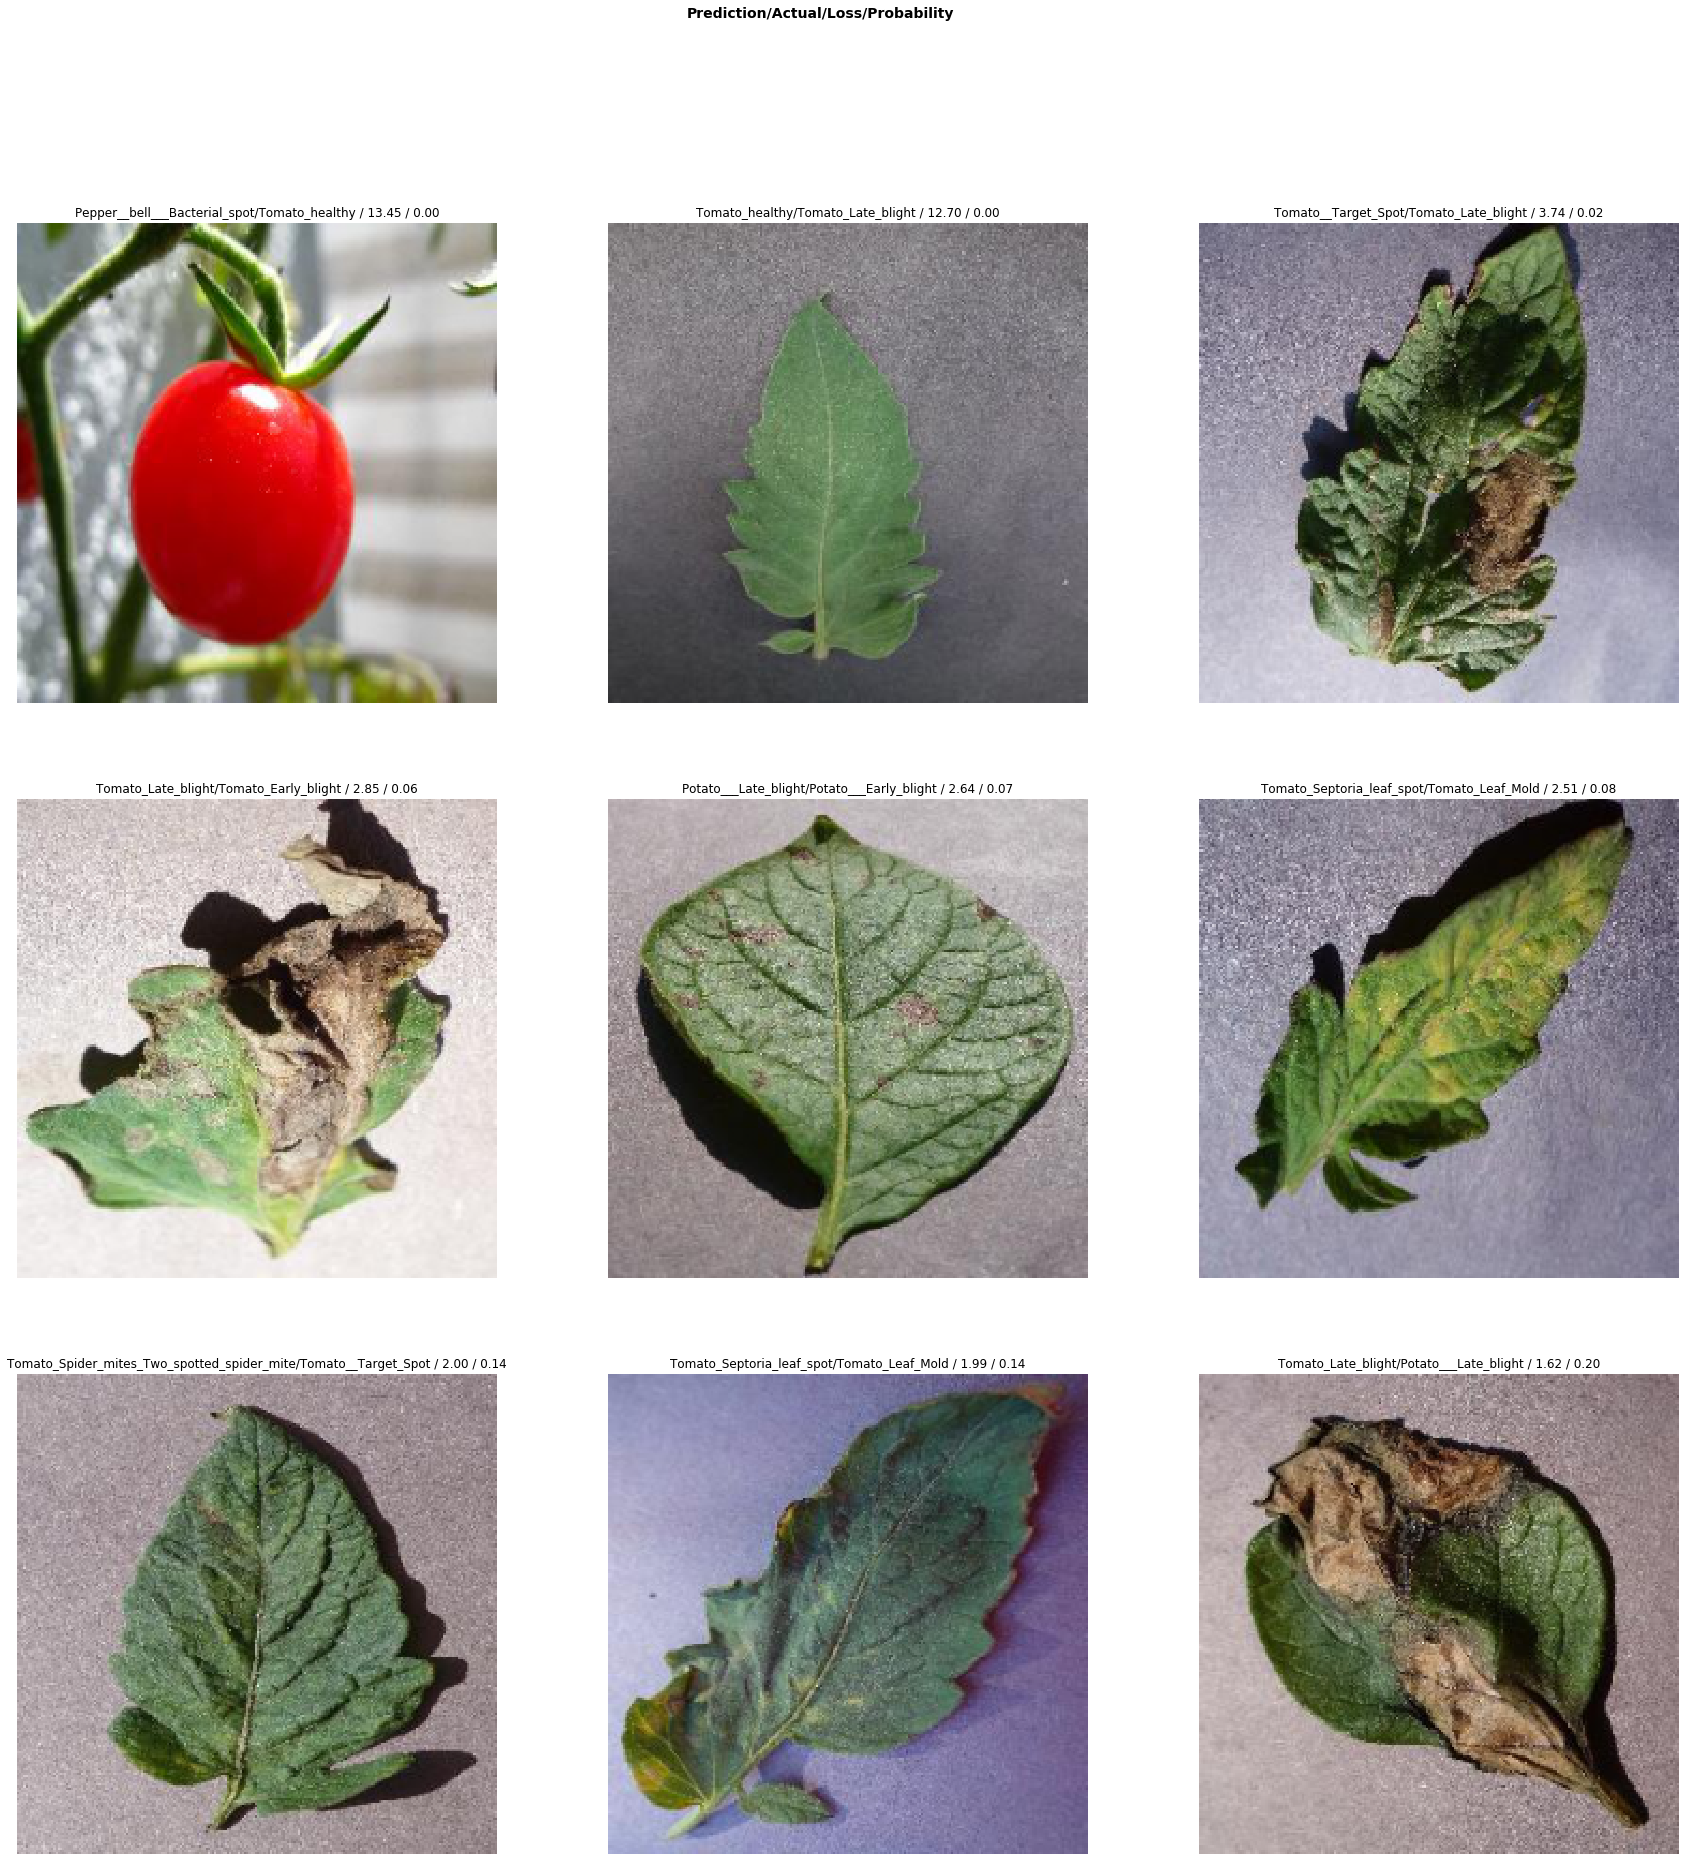

In [0]:
#print top losses
interp.plot_top_losses(9, figsize=(30,30))